# Control por Realimentación de Estados con Integrador Tipo Servo


En la mayoría de los casos, es necesario que la salida $y$ siga a una entrada de referencia u, este sistema se denomina “sistema de control tipo Servo”.


# ![Diagrama de bloques del sistema de control tipo servo](images/servo_type_state_feedback.png)


 Donde se busca que la salida cuando el tiempo tiende a infinito $y(t=\infty)=r(t=\infty)$ y el error $e(t=\infty)=0$ independiente del valor de la perturbación $w(t=\infty)$



En este contexto, para poder seguir una referencia constante existen dos estrategias de control por realimentación de estados:

1. Pre-compensador estático (al valor de la referencia)
2. Incluir un integrador en el lazo directo




## ¿Cuándo y por qué se incluye un integrador en el lazo directo?

Es especialmente útil cuando:

- Se desea que la salida siga una señal de referencia constante.
- Se necesita rechazo de perturbaciones constantes.
- Se busca asegurar un **error nulo en estado estacionario**.

Esto se logra mediante la incorporación de una acción integradora, que acumula el error en el tiempo y permite corregir desviaciones persistentes.

 
## Modelado del Sistema

Como ya sabemos, un sistema lineal en espacio de estados se representa como:

$$
\dot{x}(t) = A x(t) + B u(t)
$$

$$
y(t) = C x(t)
$$

Donde:
- $x(t)$ es el vector de estados.
- $u(t)$ es la entrada de control.
- $y(t)$ es la salida del sistema.
- $A$, $B$, y $C$ son matrices que definen la dinámica del sistema.


## Ampliación del Sistema con Integrador

Se introduce una nueva variable de estado integrador $\xi(t)$ para acumular el error:

$$
\xi(t) = \int e (t)  d(t) 
 = \int (r(t) - y(t)) dt 
 = \int (r(t) - Cx(t)) dt
$$

# ![Diagrama con integrador](images/integrator.png)



El sistema ampliado se convierte en:

$$
\begin{bmatrix}
\dot{x}(t) \\
\dot{\xi}(t)
\end{bmatrix}
=
\begin{bmatrix}
A & 0 \\
-C & 0
\end{bmatrix}
\begin{bmatrix}
x(t) \\
\xi(t)
\end{bmatrix}
+
\begin{bmatrix}
B \\
0
\end{bmatrix}
u(t)
+
\begin{bmatrix}
0 \\
1
\end{bmatrix}
r(t)
$$


Donde:

$$

A_a = \begin{bmatrix} A & 0 \\ -C & 0 \end{bmatrix}, \quad

x_a = \begin{bmatrix} x \\ \xi \end{bmatrix}

B_a = \begin{bmatrix} B \\ 0 \end{bmatrix}, \quad

E_a = \begin{bmatrix} 0 \\ 1 \end{bmatrix}, \quad
$$



$$
\dot{x}_a(t) = A_a x_a(t) + B_a u(t) + E_a r(t)
$$


Y observando el diagrama de bloques, la entrada de control se define como:

$$
u(t) = -K_2 x(t) - K_1 \xi(t)
$$

Donde:
- $K_2$ es la ganancia de realimentación de estados.
- $K_1$ es la ganancia del integrador.


O en forma compacta:


$$
u(t) = -K_a x_a(t)
$$

Donde:

$$
K_a = \begin{bmatrix} K_2 & K_1 \end{bmatrix}
$$






---

## Diseño del Controlador

Los pasos son:

1. Verificar que el sistema ampliado sea controlable.
2. Elegir ubicaciones deseadas para los polos del sistema cerrado.
3. Calcular las ganancias $K_1$ y $K_2$ usando técnicas como asignación de polos o LQR.
4. Simular el comportamiento del sistema para validar el diseño.


## Consideraciones

- El sistema debe ser completamente **observable y controlable**.
- En implementación digital, se debe evitar el **wind-up**.


---

#   Ejemplo 1

Consideramos que la siguiente ecuación diferencial representa la dinámica de un sistema:

  $$\dot{y} - \alpha y = u$$



Se desea implementar una acción de control que garantice un **error nulo** para el seguimiento de referencias constantes independientemente del valor del parámetro $\alpha$.

Suponemos inicialmente que $\alpha = 1$

El objetivo es que el polinomio característico para la dinámica aumentada sea:

  $$\Delta_f = s^2 + 3s + 2$$


---

# Resolución


$$
\dot{y} - \alpha y = u
$$

Reordenando:

$$
\dot{y} = \alpha y + u
$$

Como $y(t)$ es la salida, definimos:

$$
x(t) := y(t)
$$

Entonces, el modelo en espacio de estados queda como:
$$
\begin{cases}
\dot{x}(t) = \alpha x(t) + u(t) \\
y(t) = x(t)
\end{cases}
$$

Se desea implementar una acción de control que garantice un **error nulo** para el seguimiento de referencias constantes independientemente del valor del parámetro $\alpha$.

### Paso 1: Introducción del integrador

Agregamos un estado adicional $\xi(t)$ que integre el error:

$$
\begin{cases}
\xi(t) = \int (r(t) - y(t)) dt \\
\dot{\xi}(t) = e(t) = r(t) - y(t)
\end{cases}
$$


 
### Paso 2: Modelo aumentado

Agrupamos el sistema con integrador como:

$$
x_a(t) = 
\begin{bmatrix}
x(t) \\
\xi(t)
\end{bmatrix}
$$



La dinámica se escribe como:

$$
\dot{x}_a(t) = A_a x_a(t) + B_a u(t) + E_a r(t)
$$


donde:

$$

A_a = \begin{bmatrix} A & 0 \\ -C & 0 \end{bmatrix}, \quad

x_a = \begin{bmatrix} x \\ \xi \end{bmatrix}

B_a = \begin{bmatrix} B \\ 0 \end{bmatrix}, \quad

E_a = \begin{bmatrix} 0 \\ 1 \end{bmatrix}, \quad
$$


reemplazando los valores y con $\alpha = 1$ es:

$$
\dot{x}_a(t) =
\begin{bmatrix}
1 & 0 \\
-1 & 0
\end{bmatrix}
x_a(t) +
\begin{bmatrix}
1 \\
0
\end{bmatrix}
u(t) +
\begin{bmatrix}
0 \\
1
\end{bmatrix}
r(t)
$$

$$
y(t) = \begin{bmatrix}1 & 0\end{bmatrix}
$$


In [42]:
# !pip install slycot
#!pip install control

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import StateSpace, lsim
from control.matlab import place
 
import scipy.linalg as la  

# install control 
# https://python-control.readthedocs.io/en/latest/intro.html 
from control.matlab import * 

In [4]:
# Parámetro alpha
alpha = 1

# Matrices del sistema aumentado
A_a = np.array([[alpha, 0],
              [-1, 0]])

B_a = np.array([[1],
              [0]])

E_a = np.array([[0],
              [1]])

C = np.array([[1, 0]])
D = np.array([[0]])


---
### Paso 3: Diseño del controlador

Queremos que el sistema en lazo cerrado tenga el polinomio característico:

$$
\Delta_f(s) = s^2 + 3s + 2
$$

Si calculamos sus raices, obtenemos los polos del sistema en:

$$
\lambda_{1,2} = -1, -2
$$

Diseñamos una **realimentación de estados** tal que con la realimentación Ka los polos del sistema en lazo cerrado sean los deseados:

$$
u(t) = -K_a x_a(t)
$$

donde $K_a = \begin{bmatrix}k_1 & k_2\end{bmatrix}$ es el vector de ganancias a determinar.

El sistema en lazo cerrado queda:

$$
\dot{x}_a(t) = (A_a - B_a K_a) x_a(t) + E_a r(t)
$$


---

### Paso 4: Cálculo del vector de ganancias

Queremos:

$$
A_{cl} = A_a - B_a K_a =
\begin{bmatrix}
1 & 0 \\
-1 & 0
\end{bmatrix}
-
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\begin{bmatrix}
k_1 & k_2
\end{bmatrix}
=
\begin{bmatrix}
1 - k_1 & -k_2 \\
-1 & 0
\end{bmatrix}
$$

El polinomio característico de esta matriz debe ser:

$$
\lambda^2 + 3\lambda + 2
$$

Calculamos el determinante de $sI - A_{cl}$ y lo igualamos:


$$

det(sI - A_{cl})=
\left|
\begin{matrix}
s - (1 - k_1) & k_2 \\
1 & s
\end{matrix}
\right|
= (s - (1 - k_1))s - k_2 = s^2 - (1 - k_1)s - k_2
$$

Igualamos coeficientes:

$$
\begin{align*}
s^2 - (1 - k_1)s - k_2 &= s^2 + 3s + 2 \\
-(1 - k_1) &= 3 \Rightarrow k_1 = 4 \\
-k_2 &= 2 \Rightarrow k_2 = -2
\end{align*}
$$

Entonces:

$$
K_a = \begin{bmatrix} 4 & -2 \end{bmatrix}
$$

Y las matrices del sistema en lazo cerrado quedarían:
 
 

$$
(A_a - B_a K_a) = 
\left(
\begin{bmatrix}
1 & 0 \\
-1 & 0
\end{bmatrix}
-
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\begin{bmatrix}
4 & -2
\end{bmatrix}
\right)
$$

$$
A_cl =
\begin{bmatrix}
-3 & 2 \\
-1 & 0
\end{bmatrix}
 
$$

Podemos verificar con python:


In [13]:
# definimos los polos deseados 
# (se calculan con la ecuación de la ecuación característica deseada) 
# en s^2 + 3s + 2
#desired_poles = [-1, -2]
desired_poles = np.roots([1, 3, 2])

# hacemos la colocación de polos (se simplifica el cálculo hecho anteriormente )
# Ka = [4, -2]
Ka = place(A_a, B_a, desired_poles)  

 
# Matriz del sistema en lazo cerrado: A_a - B_a * Ka
Acl = A_a - B_a @ Ka  


#mostramos todo
print(f"desired_poles: {desired_poles}")
print(f"Ka: {Ka}")
print(f"Acl: {Acl}")    


desired_poles: [-2. -1.]
Ka: [[ 4. -2.]]
Acl: [[-3.  2.]
 [-1.  0.]]


Finalmente, se puede simular el comportamiento del sistema en lazo cerrado:

In [14]:
# Tiempo de simulación
t = np.linspace(0, 10, 500)

# Entrada de referencia (escalón unitario)
r = np.ones_like(t)

# Estado inicial (x, xi)
x0 = np.array([0, 0])

# Convertir sistema a espacio de estados
sys_cl = StateSpace(Acl, E_a, C, D)

# Simular la respuesta
t_out, y_out, x_out = lsim(sys_cl, U=r, T=t, X0=x0)




Como los polos son reales y distintos, tenemos que: $t_s = 4/{polo_{dominante}}$   
 
 Deberíamos obtener una respuesta que se estabiliza en 1 (entrada de referencia) a los 4 segundos aproximadamente. Sin sobrepaso.





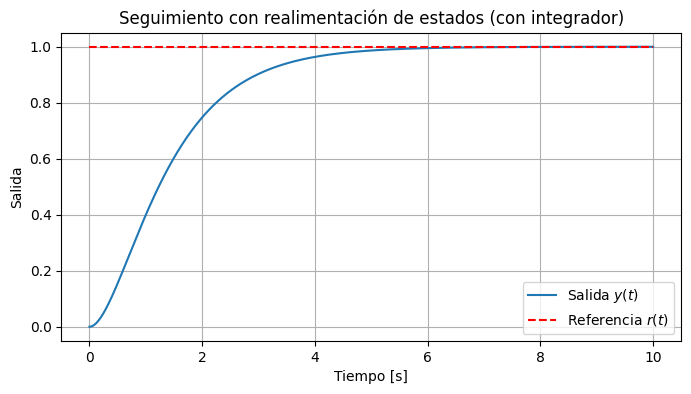

In [16]:
plt.figure(figsize=(8, 4))
plt.plot(t_out, y_out, label='Salida $y(t)$')
plt.plot(t_out, r, 'r--', label='Referencia $r(t)$')
plt.xlabel('Tiempo [s]')
plt.ylabel('Salida')
plt.title('Seguimiento con realimentación de estados (con integrador)')
plt.legend()
plt.grid(True)
plt.show()


## Ejemplo 2: 

Supongamos que tenemos el siguiente sistema que NO está en la forma canónica controlable:

$\dot{\vec{x}}=\begin{bmatrix}
0& 1 & 0 & 0\\
0 & 0 & -1 &0 \\
0 & 0 & 0 &1 \\
0 & 0 & 5 &0
\end{bmatrix}\vec{x}+\begin{bmatrix}0\\1\\0\\-2\end{bmatrix}u(t)$

$y(s)=\begin{bmatrix}1 & 0 & 0&0 \end{bmatrix}\vec{x}$


In [27]:
# Sistema
a = np.array([[0,1,0,0],[0,0,-1,0],[0,0,0,1],[0,0,5,0]]);
b = np.array([[0],[1],[0],[-2]]);
c = np.array([1, 0, 0, 0]);
d = 0;

#Sistema en Espacio de Estados
sys = StateSpace(a,b,c,0);

#Controlabilidad
Co = ctrb(a,b)
#Rango de la matriz de controlabilidad
print(f"Matriz de controlabilidad:\n {Co}")
print('El rango de la matriz Co= ', np.linalg.matrix_rank(Co))

Matriz de controlabilidad:
 [[  0.   1.   0.   2.]
 [  1.   0.   2.   0.]
 [  0.  -2.   0. -10.]
 [ -2.   0. -10.   0.]]
El rango de la matriz Co=  4


# Sistema aumentado: Planta + Controlador

$$ 
\begin{bmatrix}\dot{\mathbf{x}}(t)\\\dot{\mathbf{\xi}}(t)\end{bmatrix}=\begin{bmatrix}
\mathbf{A}& 0 \\
\mathbf{-C} & \mathbf{0}
\end{bmatrix}
\begin{bmatrix}{\mathbf{x}}(t)\\{\mathbf{\xi}}(t)\end{bmatrix}
+\begin{bmatrix}\mathbf{B}\\\mathbf{0}\end{bmatrix}\mathbf{u}(t)+
\begin{bmatrix}\mathbf{0}\\\mathbf{I} \end{bmatrix}\mathbf{r}(t)
$$


In [33]:
# Vamos a construir el sistema aumentado por partes. 

# Crear vector de ceros del mismo tamaño que "A" para agregarla en la segunda columna de la 
# matriz A aumentada. 
Za = np.zeros((len(a),1)); 

# Construir la primera fila de la matriz A aumentada [A | Za]
Aa = np.hstack((a,Za));

# Completar la matriz A aumentada agregando -C en la última fila 
Ca = np.append(c,0); # Extender C agregando una columna de extra (el 0)
Aa = np.vstack((Aa,-Ca));

# Construir el vector B aumentado agregando un 0 para el integrador
Ba = np.append([b],[0])[np.newaxis];
# Transponer B para tener la dimensión correcta
Ba = np.transpose(Ba);


# Construir el vector E (entrada de referencia) con ceros y un 1 para el integrador
Ea = np.append([Za],[1])[np.newaxis];
# Transponer E para tener la dimensión correcta
Ea = np.transpose(Ea);



# Realimentación de Estados

In [37]:
# Polos deseados sin integrador
# Polinomio deseado: s^5 + 10s^4 + 37.5s^3 + 66s^2 + 55s + 25
# Se obtiene al multiplicar (s + 5) * (s^4 + 5s^3 + 10.5s^2 + 11s + 5)
polos = np.roots(np.convolve([1,5],[1, 5, 10.5, 11, 5]));

In [38]:
Ka = place(Aa,Ba,polos)
print('[K1, K2]: ',Ka)

[K1, K2]:  [[-20.         -23.94444444 -30.25       -16.97222222   8.33333333]]


# Lazo cerrado

In [39]:
Af=Aa-Ba*Ka
Ef = la.eig(Af);
print(Ef[0])

[-5. +0.j  -1.5+0.5j -1.5-0.5j -1. +1.j  -1. -1.j ]


In [40]:
sys_f=StateSpace(Af,Ea,Ca,0)
print(sys_f)

<StateSpace>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (5): ['x[0]', 'x[1]', 'x[2]', 'x[3]', 'x[4]']

A = [[  0.           1.           0.           0.           0.        ]
     [ 20.          23.94444444  29.25        16.97222222  -8.33333333]
     [  0.           0.           0.           1.           0.        ]
     [-40.         -47.88888889 -55.5        -33.94444444  16.66666667]
     [ -1.           0.           0.           0.           0.        ]]

B = [[0.]
     [0.]
     [0.]
     [0.]
     [1.]]

C = [[1. 0. 0. 0. 0.]]

D = [[0.]]



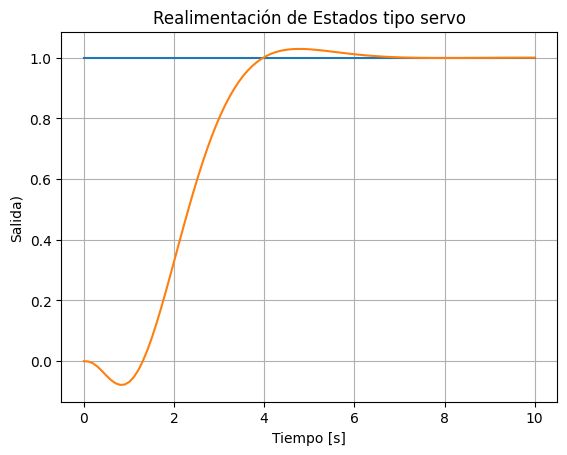

In [41]:
#Respuesta del sistema
ts = linspace(0,10,100);
r = np.ones(100);
yi, t = step(sys_f, ts)
plt.figure(1)
plt.plot(t,r,t,yi)
plt.title('Realimentación de Estados tipo servo');
plt.xlabel('Tiempo [s]')
plt.ylabel('Salida)')
plt.grid(True)